This is not a true robust recommendation system, to describe it more accurately,it just tells you what movies/items are most similar to your movie choice.

In [1]:
import pandas as pd
import numpy as np

In [3]:
columns_names = ['id_usuario','item_id','nota','timestamp']

In [4]:
df = pd.read_csv('u.data', sep='\t', names= columns_names )

In [5]:
df.head()

,id_usuario,item_id,nota,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [6]:
titulos_filmes = pd.read_csv('Movie_Id_Titles')

In [7]:
titulos_filmes.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [8]:
df = pd.merge(df, titulos_filmes, on = 'item_id')

In [9]:
df.head()

,id_usuario,item_id,nota,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')

In [13]:
df.groupby('title')['nota'].mean()

title
'Til There Was You (1997)                2.333333
1-900 (1994)                             2.600000
101 Dalmatians (1996)                    2.908257
12 Angry Men (1957)                      4.344000
187 (1997)                               3.024390
                                           ...   
Young Guns II (1990)                     2.772727
Young Poisoner's Handbook, The (1995)    3.341463
Zeus and Roxanne (1997)                  2.166667
unknown                                  3.444444
Á köldum klaka (Cold Fever) (1994)       3.000000
Name: nota, Length: 1664, dtype: float64

In [14]:
df.groupby('title')['nota'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: nota, dtype: float64

In [15]:
df.groupby('title')['nota'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: nota, dtype: int64

In [17]:
avaliacoes = pd.DataFrame(df.groupby('title')['nota'].mean())

In [18]:
avaliacoes.head()

,nota
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [19]:
avaliacoes['numero de votos'] = pd.DataFrame(df.groupby('title')['nota'].count())

In [20]:
avaliacoes.head()

,nota,numero de votos
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


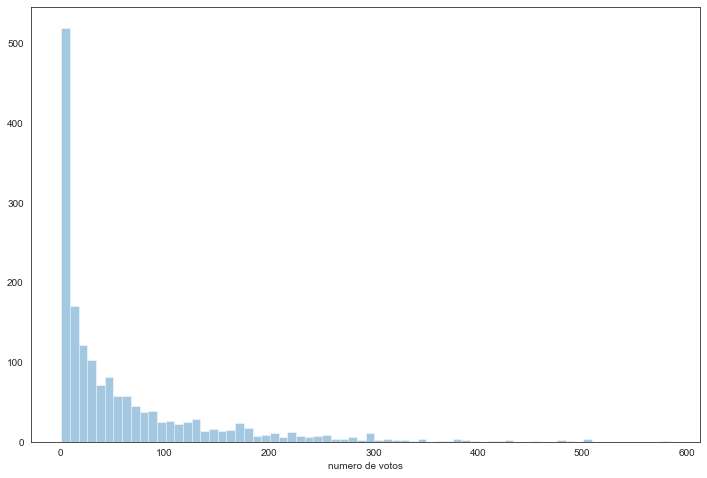

In [25]:
plt.figure(figsize=(12, 8))
sns.distplot(avaliacoes['numero de votos'], bins=70, kde=False)

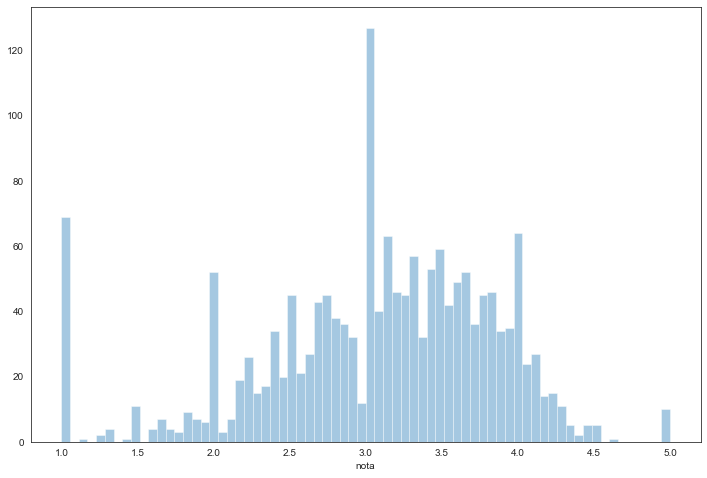

In [28]:
plt.figure(figsize=(12, 8))
sns.distplot(avaliacoes['nota'], bins=70, kde=False)

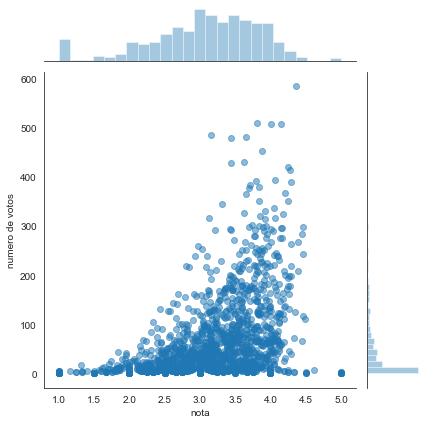

In [43]:
sns.jointplot(x='nota', y='numero de votos', data= avaliacoes, alpha = 0.5)

In [44]:
df.head()

,id_usuario,item_id,nota,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [45]:
filmes_mat = df.pivot_table(index='id_usuario', columns= 'title', values= 'nota')

In [46]:
filmes_mat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
id_usuario,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
avaliacoes.sort_values('numero de votos', ascending=False).head(10)

,nota,numero de votos
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [50]:
starwars_avaliacao_usuario = filmes_mat['Star Wars (1977)']
liarliar_avaliacao_usuario = filmes_mat['Liar Liar (1997)']

In [51]:
starwars_avaliacao_usuario.head()

id_usuario
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [55]:
similar_starwars = filmes_mat.corrwith(starwars_avaliacao_usuario)

In [56]:
similar_liar_liar = filmes_mat.corrwith(liarliar_avaliacao_usuario)

In [57]:
corr_starwars = pd.DataFrame(similar_starwars, columns = ['Correlacao'])
corr_starwars.dropna(inplace=True)

In [58]:
corr_starwars.head()

,Correlacao
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [63]:
corr_starwars.sort_values('Correlacao', ascending= False).head(10)

,Correlacao
title,
Hollow Reed (1996),1.0
Stripes (1981),1.0
"Beans of Egypt, Maine, The (1994)",1.0
Safe Passage (1994),1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0
"Outlaw, The (1943)",1.0
"Line King: Al Hirschfeld, The (1996)",1.0
Hurricane Streets (1998),1.0
"Good Man in Africa, A (1994)",1.0


In [64]:
corr_starwars = corr_starwars.join(avaliacoes['numero de votos'])

In [66]:
corr_starwars.head(10)

,Correlacao,numero de votos
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41
2 Days in the Valley (1996),0.066654,93
"20,000 Leagues Under the Sea (1954)",0.289768,72
2001: A Space Odyssey (1968),0.230884,259
"39 Steps, The (1935)",0.106453,59


In [68]:
corr_starwars[corr_starwars['numero de votos'] > 100].sort_values('Correlacao', ascending= False).head(10)

,Correlacao,numero de votos
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115


In [69]:
corr_liarliar = pd.DataFrame(similar_liar_liar, columns=['Correlacao'])

In [71]:
corr_liarliar.dropna(inplace=True)

In [72]:
corr_liarliar = corr_liarliar.join(avaliacoes['numero de votos'])

In [77]:
corr_liarliar[corr_liarliar['numero de votos'] > 100].sort_values('Correlacao', ascending= False)

,Correlacao,numero de votos
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
...,...,...
Hoop Dreams (1994),-0.184503,117
Ed Wood (1994),-0.199481,133
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963),-0.238092,194
